# _Data Analysis Project_
## Brazilian E-Commerce Public Dataset
- Naufal Mu'afi
- nmuafi1@gmail.com
- naufalmuafi1

# Business Question Definition
---

1. How has the company's sales performance and revenue been in the last few months?
1. Which products are the best-selling and the least-selling?
1. What is our largest customer segment?
1. Which payment type is most preferred and used by customers?
1. When was the last time the customer made a purchase?
2. How often do customers make purchases?
3. How much money has the customer spent?

First, import all the the library that we used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Wrangling Section
---

## _Gathering Data_

import `customers_dataset.csv` data into dataframe

In [2]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

import `geolocation_dataset.csv` data into dataframe

In [3]:
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

import `order_item_dataset.csv` data into dataframe

In [4]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

import `order_payments_dataset.csv` data into dataframe

In [5]:
order_payments_df = pd.read_csv("./data/order_payments_dataset.csv")
order_payments_df.head()


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

import `order_reviews_dataset.csv` data into dataframe

In [6]:
order_reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

import `orders_dataset.csv` data into dataframe

In [7]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

import `product_category_name_translation.csv` (pcn) data into dataframe

In [8]:
pcn_df = pd.read_csv("./data/product_category_name_translation.csv")
pcn_df.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

import `products_dataset.csv` data into dataframe

In [9]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

import `sellers_dataset.csv` data into dataframe

In [10]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

## _Assessing Data_

### Assessing to `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print(f"\nNumber of duplications: {customers_df.duplicated().sum()}")
customers_df.describe(include='all')


Number of duplications: 0


customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

**interim analysis**: The dataset is already clean.

**note**: The zip code has already 5 digit, but leading zeros in integer literals are not permitted. so example if the zip code is 9780, the fact is 09780.

### Assessing to `geolocation_df`

In [13]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
print(f"\nNumber of duplications: {geolocation_df.duplicated().sum()}")
geolocation_df.describe()


Number of duplications: 261831


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

**interim analysis**: There's 261831 duplicate data.

**note**: The zip code has already 5 digit, but leading zeros in integer literals are not permitted. so example if the zip code is 9780, the fact is 09780.

### Assessing to `order_items_df`

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
print(f"\nNumber of duplications: {order_items_df.duplicated().sum()}")
order_items_df.describe()


Number of duplications: 0


order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

**interim analysis**: There's a data type error for shipping_limit_date column.

### Assessing to `order_payments_df`

In [17]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
print(f"\nNumber of duplications: {order_payments_df.duplicated().sum()}")
order_payments_df.describe()


Number of duplications: 0


payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

**interim analysis**: The dataset is already clean.

### Assessing to `order_reviews_df`

In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [21]:
print(f"\nNumber of duplications: {order_reviews_df.duplicated().sum()}")
order_reviews_df.describe()


Number of duplications: 0


review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

**interim analysis**: There are missing values in both the review_comment_title and review_comment_message columns, with a total of 876565 and 58247 missing values, respectively. and there're a data type error for review_creation_date and review_answer_timestamp column.

### Assessing to `orders_df`

In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [23]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [24]:
print(f"\nNumber of duplications: {orders_df.duplicated().sum()}")
orders_df.describe()


Number of duplications: 0


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

**interim analysis**: There are missing values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date, with a total of 160, 1783 and 2965 missing values, respectively. and there're data type error for order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date column.

### Assessing to `pcn_df`

In [25]:
pcn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [26]:
print(f"\nNumber of duplications: {pcn_df.duplicated().sum()}")
pcn_df.describe()


Number of duplications: 0


product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

**interim analysis**: dataset is already clean.

### Assessing to `products_df`

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
products_df.isna().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [29]:
print(f"\nNumber of duplications: {products_df.duplicated().sum()}")
products_df.describe()


Number of duplications: 0


product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

**interim analysis**: dataset column except product_id there are missing value.

### Assessing to `sellers_df`

In [30]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [31]:
print(f"\nNumber of duplications: {sellers_df.duplicated().sum()}")
sellers_df.describe()


Number of duplications: 0


seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

**interim analysis**: The dataset is already clean.

**note**: The zip code has already 5 digit, but leading zeros in integer literals are not permitted. so example if the zip code is 9780, the fact is 09780.

### Summary of Data Assessment
---

#### `customers_df`
- The dataset is already clean.

#### `geolocation_df`
- There are 261,831 duplicate records.

#### `order_items_df`
- There's a data type error for shipping_limit_date column.

#### `order_payments_df`
- The dataset is already clean.

#### `order_reviews_df`
- Missing Data: There are missing values in both the `review_comment_title` and `review_comment_message` columns, with a total of 876,565 and 58,247 missing values, respectively.
- There're a data type error for review_creation_date and review_answer_timestamp column.

#### `orders_df`
- Missing Data: There are missing values in the `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` columns, with a total of 160, 1,783, and 2,965 missing values, respectively.
- There're data type error for order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date column.

#### `pcn_df`
- The dataset is already clean.

#### `products_df`
- Missing Values: Except for the `product_id` column, there are missing values in other columns.

#### `sellers_df`
- The dataset is already clean.


## _Cleaning Data_

### Cleaning data `geolocation_df`

drop the duplicates data

In [32]:
geolocation_df.drop_duplicates(inplace=True)

In [33]:
print(f"Number of duplications: {geolocation_df.duplicated().sum()}")

Number of duplications: 0


### Cleaning data `order_items_df`

convert "shipping_limit_date" data type from object to datetime

In [34]:
order_items_df["shipping_limit_date"] = pd.to_datetime(
    order_items_df["shipping_limit_date"])


In [35]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Cleaning data `order_reviews_df`

#### Fill NA Review Comments Title

In [36]:
order_reviews_df.review_comment_title.isna().sum()

87656

for objective reason, so the missing value will be place to "Prefer not to say".

In [37]:
order_reviews_df.review_comment_title.fillna(
  value="Prefer not to say",
  inplace=True)

In [38]:
order_reviews_df.review_comment_title.isna().sum()


0

In [39]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Prefer not to say            87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: count, Length: 4528, dtype: int64

#### Fill NA Review Comments Message

In [40]:
order_reviews_df.review_comment_message.isna().sum()

58247

In [41]:
order_reviews_df.review_comment_message.fillna(
    value="Prefer not to say",
    inplace=True)


In [42]:
order_reviews_df.review_comment_message.value_counts()


review_comment_message
Prefer not to say                                                                                                                                                                                      58247
Muito bom                                                                                                                                                                                                230
Bom                                                                                                                                                                                                      189
muito bom                                                                                                                                                                                                122
bom                                                                                                                                                          

In [43]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Fix Data Type Error

In [44]:
datetime_column = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_column:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])


In [45]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Cleaning data `orders_df`

#### Fix Data Type Error

In [46]:
order_datetime_column = ["order_purchase_timestamp",
                         "order_approved_at",
                         "order_delivered_carrier_date",
                         "order_delivered_customer_date",
                         "order_estimated_delivery_date"]

for column in order_datetime_column:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [47]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Fix Missing Value

First, we drop "order_delivered_carrier_date" column that have missing value. Because, if we fill with something, we can't make sure it's objective and based on fact.

In [48]:
orders_df.dropna(subset=['order_delivered_carrier_date'], inplace=True)

In [49]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        0
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64

Secondly, we can fill "order_approved_at" with the delta of user purchase timestamp and approved duration mean

In [50]:
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
approved_rate = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
approved_rate = approved_rate.apply(lambda x: x.total_seconds())
orders_df['approved_rate'] = round(approved_rate/60)
orders_df.sample(5)

order_id                       customer_id  \
17333  e597a2f203b82a93de9dc256e72c3e8d  4a4547a6adb1454321d88e2d545c63ee   
4107   f6ad54b5be9c3a496973acd1b1c8b714  6f67142db4b6ec414dd624724b738f3f   
42900  d522bee95569dfe88b8bdcf435db31ab  0f7fa9801629cabf77e67ff1713ffc0f   
69293  8624511aa767a83ed91a47c158320964  376b286a6479ddacb9374ba88f19178b   
51878  f2c78ae8a51c7fdd3c3f786f6dc49a6c  1fc9900fcdc29bc77cbb2125c60e2209   

      order_status order_purchase_timestamp   order_approved_at  \
17333    delivered      2018-01-11 17:48:39 2018-01-11 18:31:01   
4107     delivered      2018-08-13 14:18:44 2018-08-14 04:25:23   
42900    delivered      2018-02-23 15:28:47 2018-02-23 15:54:21   
69293    delivered      2018-08-06 15:26:36 2018-08-06 15:44:40   
51878    delivered      2018-04-12 15:14:06 2018-04-13 02:11:08   

      order_delivered_carrier_date order_delivered_customer_date  \
17333          2018-01-12 20:29:53           2018-01-30 22:34:03   
4107           2018-08-15 14:25:00           2018-08-21 15:16:49   
42900          2018-03-01 18:46:57           2018-03-14 23:51:40   
69293          2018-08-28 12:58:00           2018-09-03 17:26:49   
51878          2018-04-13 19:22:50           2018-04-19 16:52:54   

      order_estimated_delivery_date  approved_rate  
17333                    2018-02-14           42.0  
4107                     2018-08-30          847.0  
42900                    2018-03-21           26.0  
69293                    2018-08-29           18.0  
51878                    2018-05-14          657.0

In [51]:
mean_approved_rate = orders_df["approved_rate"].mean()
print(f"Approved Rate Mean: {mean_approved_rate} minutes")

orders_df['order_approved_at'].fillna(
    value=orders_df['order_purchase_timestamp'] +
    pd.to_timedelta(mean_approved_rate, unit='m'),
    inplace=True
)

orders_df.drop("approved_rate", axis=1, inplace=True)

Approved Rate Mean: 617.4651693908484 minutes


In [52]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64

same as before, we can fill "order_delivered_customer_date" with the delta of order_estimated_delivery_date minus factual delivered duration mean

In [53]:
fact_delivery_dur = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_customer_date"]
fact_delivery_dur = fact_delivery_dur.apply(lambda x: x.total_seconds())
orders_df["fact_delivery_dur"] = round(fact_delivery_dur/86400)
orders_df.sample(5)

order_id                       customer_id  \
2743   c2878b60d8e2a4ee3b463b81e9ddd8c1  e13a9c939f54c93a902868caeb1bfa59   
75646  0c45caaab2bcc146bef109bee64d3b98  5087defc2b2ec1e20defc362427ad2fe   
61217  ba91b4b93947b208ec698475173402b7  ff84a9059c97689052afa88a20cfc52b   
3197   a558df35f2582dce7a0a683f618ea859  70e9cf1e18e454538ab51d6b0c52758d   
26924  42a7750bca23818abc83ea9c3298eace  be036ccfc3a6856c840a58ce5604d579   

      order_status order_purchase_timestamp   order_approved_at  \
2743     delivered      2017-06-14 11:38:11 2017-06-14 11:55:21   
75646    delivered      2017-06-15 12:56:38 2017-06-17 03:16:43   
61217    delivered      2018-07-23 20:29:21 2018-07-25 02:45:14   
3197     delivered      2018-02-19 06:54:22 2018-02-20 06:46:31   
26924      shipped      2018-06-15 16:50:35 2018-06-15 17:25:59   

      order_delivered_carrier_date order_delivered_customer_date  \
2743           2017-06-16 06:56:38           2017-06-28 14:32:25   
75646          2017-06-19 20:22:47           2017-06-27 15:09:46   
61217          2018-07-25 12:53:00           2018-08-07 20:14:00   
3197           2018-02-20 20:12:58           2018-03-07 20:29:49   
26924          2018-06-19 15:04:00                           NaT   

      order_estimated_delivery_date  fact_delivery_dur  
2743                     2017-07-11               12.0  
75646                    2017-07-12               14.0  
61217                    2018-08-23               15.0  
3197                     2018-03-15                7.0  
26924                    2018-06-29                NaN

In [54]:
mean_fact_delivery_dur = orders_df["fact_delivery_dur"].mean()
print(f"Fact Delivery Duration Mean: {mean_fact_delivery_dur} days")

orders_df['order_delivered_customer_date'].fillna(
    value=orders_df['order_estimated_delivery_date'] -
    pd.to_timedelta(mean_fact_delivery_dur, unit='m'),
    inplace=True
)

orders_df.drop("fact_delivery_dur", axis=1, inplace=True)

Fact Delivery Duration Mean: 11.00884166882612 days


In [55]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [56]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97658 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97658 non-null  object        
 1   customer_id                    97658 non-null  object        
 2   order_status                   97658 non-null  object        
 3   order_purchase_timestamp       97658 non-null  datetime64[ns]
 4   order_approved_at              97658 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  97658 non-null  datetime64[ns]
 7   order_estimated_delivery_date  97658 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


### Cleaning data `products_df`

In [57]:
products_df.dropna(inplace=True)
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [58]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


# Exploratory Data Analysis (EDA) Section
---

## `customers_df` Exploration

In [59]:
customers_df.describe(include="all")

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

### Customer Demograhphy by City

In [60]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Customer Demograhphy by State

In [61]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

## `geolocation_df` Exploration

In [62]:
geolocation_df.describe(include="all")

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                 738332.000000    738332.000000    738332.000000   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   38316.086800       -20.998353       -46.461098   
std                    30632.496675         5.892315         4.393705   
min                     1001.000000       -36.605374      -101.466766   
25%                    12600.000000       -23.603061       -48.867822   
50%                    29144.000000       -22.873588       -46.647278   
75%                    65950.000000       -19.923336       -43.836974   
max                    99990.000000        45.065933       121.105394   

       geolocation_city geolocation_state  
count            738332            738332  
unique             8011                27  
top           sao paulo                SP  
freq              79927            285976  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

In [63]:
geolocation_df.groupby(by="geolocation_state").agg({
  "geolocation_city": "nunique",
  "geolocation_zip_code_prefix": "nunique"
})

geolocation_city  geolocation_zip_code_prefix
geolocation_state                                               
AC                               34                           46
AL                              130                          178
AM                               74                          144
AP                               17                           26
BA                              652                          992
CE                              260                          548
DF                               28                          516
ES                              160                          315
GO                              384                          773
MA                              299                          313
MG                             1426                         1868
MS                              133                          242
MT                              213                          254
PA                              219                          309
PB                              254                          324
PE                              267                          596
PI                              278                          307
PR                              651                         1046
RJ                              245                         1390
RN                              214                          280
RO                               83                          108
RR                               14                           28
RS                              691                         1132
SC                              420                          620
SE                               96                          135
SP                             1048                         6349
TO                              173                          184

## `order_items_df` Exploration

In [64]:
order_items_df.describe(include="all")

order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   
std                                  NaN       0.705124   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

                  shipping_limit_date          price  freight_value  
count                          112650  112650.000000  112650.000000  
unique                            NaN            NaN            NaN  
top                               NaN            NaN            NaN  
freq                              NaN            NaN            NaN  
mean    2018-01-07 15:36:52.192685312     120.653739      19.990320  
min               2016-09-19 00:15:34       0.850000       0.000000  
25%        2017-09-20 20:57:27.500000      39.900000      13.080000  
50%               2018-01-26 13:59:35      74.990000      16.260000  
75%     2018-05-10 14:34:00.750000128     134.900000      21.150000  
max               2020-04-09 22:35:08    6735.000000     409.680000  
std                               NaN     183.633928      15.806405

In [65]:
order_items_df.sort_values(by="price", ascending=False)

order_id  order_item_id  \
3556    0812eb902a67711a1cb742b3cdaa65ae              1   
112233  fefacc66af859508bf1a7934eab1e97f              1   
107841  f5136e38d1a14a4dbd87dff67da82701              1   
74336   a96610ab360d42a2e5335a3998b4718a              1   
11249   199af31afc78c699f0dbf71fb178d4d4              1   
...                                  ...            ...   
57304   8272b63d03f5f79c56e9e4120aec44ef              8   
57300   8272b63d03f5f79c56e9e4120aec44ef              4   
48625   6e864b3f0ec71031117ad4cf46b7f2a1              1   
27652   3ee6513ae7ea23bdfab5b9ab60bffcb5              1   
87081   c5bdd8ef3c0ec420232e668302179113              2   

                              product_id                         seller_id  \
3556    489ae2aa008f021502940f251d4cce7f  e3b4998c7a498169dc7bce44e6bb6277   
112233  69c590f7ffc7bf8db97190b6cb6ed62e  80ceebb4ee9b31afb6c6a916a574a1e2   
107841  1bdf5e6731585cf01aa8169c7028d6ad  ee27a8f15b1dded4d213a468ba4eb391   
74336   a6492cc69376c469ab6f61d8f44de961  59417c56835dd8e2e72f91f809cd4092   
11249   c3ed642d592594bb648ff4a04cee2747  59417c56835dd8e2e72f91f809cd4092   
...                                  ...                               ...   
57304   05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
57300   05b515fdc76e888aada3c6d66c201dff  2709af9587499e95e803a6498a5a56e9   
48625   8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
27652   8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   
87081   8a3254bee785a526d548a81a9bc3c9be  96804ea39d96eb908e7c3afdb671bb9e   

       shipping_limit_date    price  freight_value  
3556   2017-02-16 20:37:36  6735.00         194.31  
112233 2018-08-02 04:05:13  6729.00         193.21  
107841 2017-06-15 02:45:17  6499.00         227.66  
74336  2017-04-18 13:25:18  4799.00         151.34  
11249  2017-05-09 15:50:15  4690.00          74.34  
...                    ...      ...            ...  
57304  2017-07-21 18:25:23     1.20           7.89  
57300  2017-07-21 18:25:23     1.20           7.89  
48625  2018-05-02 20:30:34     0.85          18.23  
27652  2018-05-04 03:55:26     0.85          18.23  
87081  2018-05-07 02:55:22     0.85          22.30  

[112650 rows x 7 columns]

## `order_payments_df` Exploration

In [66]:
order_payments_df.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

### Total Payment Type

In [67]:
order_payments_df.groupby("payment_type").size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64

## `order_reviews_df` Exploration

In [68]:
order_reviews_df.describe(include="all")

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                99224                  99224   
unique           NaN                 4528                  36160   
top              NaN    Prefer not to say      Prefer not to say   
freq             NaN                87656                  58247   
mean        4.086421                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   
std         1.347579                  NaN                    NaN   

                 review_creation_date        review_answer_timestamp  
count                           99224                          99224  
unique                            NaN                            NaN  
top                               NaN                            NaN  
freq                              NaN                            NaN  
mean    2018-01-12 20:49:23.948238336  2018-01-16 00:23:56.977938688  
min               2016-10-02 00:00:00            2016-10-07 18:32:28  
25%               2017-09-23 00:00:00  2017-09-27 01:53:27.249999872  
50%               2018-02-02 00:00:00     2018-02-04 22:41:47.500000  
75%               2018-05-16 00:00:00     2018-05-20 12:11:21.500000  
max               2018-08-31 00:00:00            2018-10-29 12:27:35  
std                               NaN                            NaN

### Response Answer Time

In [69]:
response_answer_time = order_reviews_df["review_answer_timestamp"] - order_reviews_df["review_creation_date"]
response_answer_time = response_answer_time.apply(lambda x: x.total_seconds())
order_reviews_df["response_answer_time"] = round(response_answer_time/3600)
order_reviews_df.sample(5)

review_id                          order_id  \
20037  44c748a44241e04e739b207c50e94218  dafc4b5ceac0b3e1eeb90f581dacebb6   
71089  0960d1f998f0b6cbf8042ce1f0ea8370  1280f995f41bf95106134b4d116a5f01   
9483   14c38bf0bf4082c923f3fbba24d8d762  09d6c2dd8c08336a2cbd1c449a2ef158   
87345  361e6c6ed45c3753d44795f7f9a7e822  f5fcef5d7789fe60b872effa519c61f7   
28449  7c7e4ae1bd30d79b2e9d7b840ec10dd6  c6269b5410a266a9315ae05d06a3bbca   

       review_score     review_comment_title      review_comment_message  \
20037             5        Prefer not to say           Prefer not to say   
71089             4        Prefer not to say                  otima loja   
9483              4        Prefer not to say           Prefer not to say   
87345             2  Quero cancelar a compra  Quero cancelar essa compra   
28449             3        Prefer not to say           Prefer not to say   

      review_creation_date review_answer_timestamp  response_answer_time  
20037           2017-11-25     2017-11-26 12:01:40                  36.0  
71089           2017-05-16     2017-05-17 16:48:54                  41.0  
9483            2018-02-22     2018-02-24 23:50:57                  72.0  
87345           2018-06-23     2018-06-26 21:25:28                  93.0  
28449           2017-05-26     2017-05-27 04:15:22                  28.0

## `orders_df` Exploration

### Delivery Time Duration

In [70]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.sample(5)

order_id                       customer_id  \
67072  dadd179aa43944bfe3ebc6e6188b2606  b3c273a2f1c0a7b1e53842aa86de27ad   
63829  7b49220cf93758de83b2e9adefaca923  6f235f190ca8edb9efa18189f0e7a0df   
38512  fb08dd566174dbeebc7a8657b0c1aeb7  bde359315c6d85850ae136185b1060d5   
61158  9cd2736eb96c50673ad7bb77faacf085  2b9aee680f290817677da223b212f7df   
22864  58c43e59cd24b301789382786fa841f2  9904f5a76e6579ef02a0e0a948f1073b   

      order_status order_purchase_timestamp   order_approved_at  \
67072    delivered      2017-10-16 17:11:22 2017-10-16 17:35:19   
63829    delivered      2017-12-14 14:02:34 2017-12-14 14:13:32   
38512    delivered      2018-01-20 13:10:45 2018-01-20 13:30:16   
61158    delivered      2018-01-30 21:34:22 2018-01-30 21:53:42   
22864    delivered      2018-03-11 17:44:34 2018-03-11 18:08:23   

      order_delivered_carrier_date order_delivered_customer_date  \
67072          2017-10-20 15:51:52           2017-10-24 19:50:03   
63829          2017-12-15 18:32:09           2017-12-26 20:57:03   
38512          2018-01-22 21:11:52           2018-02-01 18:42:19   
61158          2018-02-03 14:45:00           2018-02-15 14:19:25   
22864          2018-03-12 22:36:33           2018-04-26 21:04:06   

      order_estimated_delivery_date  delivery_time  
67072                    2017-10-26            4.0  
63829                    2018-01-19           11.0  
38512                    2018-02-15           10.0  
61158                    2018-03-01           12.0  
22864                    2018-04-16           45.0

In [71]:
orders_df.describe(include="all")

order_id                       customer_id  \
count                              97658                             97658   
unique                             97658                             97658   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count         97658                          97658   
unique            3                            NaN   
top       delivered                            NaN   
freq          96476                            NaN   
mean            NaN  2018-01-01 16:12:46.194085376   
min             NaN            2016-09-04 21:15:19   
25%             NaN     2017-09-13 19:59:25.500000   
50%             NaN     2018-01-20 19:27:35.500000   
75%             NaN  2018-05-05 10:26:47.249999872   
max             NaN            2018-09-03 09:06:57   
std             NaN                            NaN   

                    order_approved_at   order_delivered_carrier_date  \
count                           97658                          97658   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2018-01-02 02:30:14.117570816  2018-01-04 21:49:48.138278656   
min               2016-09-15 12:16:38            2016-10-08 10:34:01   
25%     2017-09-14 03:05:58.750000128  2017-09-15 22:28:50.249999872   
50%        2018-01-22 13:47:54.500000            2018-01-24 16:10:58   
75%        2018-05-05 16:26:16.500000            2018-05-08 13:37:45   
max               2018-09-03 17:40:06            2018-09-11 19:48:28   
std                               NaN                            NaN   

        order_delivered_customer_date  order_estimated_delivery_date  \
count                           97658                          97658   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2018-01-14 09:15:32.153212416  2018-01-25 10:18:51.704519680   
min               2016-10-11 13:46:32            2016-10-04 00:00:00   
25%     2017-09-25 20:36:30.750000128            2017-10-05 00:00:00   
50%               2018-02-02 20:50:29            2018-02-16 00:00:00   
75%        2018-05-15 21:07:46.500000            2018-05-28 00:00:00   
max               2018-10-17 13:22:46            2018-10-25 00:00:00   
std                               NaN                            NaN   

        delivery_time  
count    97658.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean         9.436656  
min        -16.000000  
25%          4.000000  
50%          7.000000  
75%         12.000000  
max        205.000000  
std          8.880689

### Delivery Status

In [72]:
orders_df.groupby("order_status").size().sort_values(ascending=False)

order_status
delivered    96476
shipped       1107
canceled        75
dtype: int64

## `pcn_df` Exploration

In [73]:
pcn_df.describe(include="all")

product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

## `products_df` Exploration

In [74]:
products_df.describe(include="all")

product_id product_category_name  \
count                              32340                 32340   
unique                             32340                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

        product_name_lenght  product_description_lenght  product_photos_qty  \
count          32340.000000                32340.000000        32340.000000   
unique                  NaN                         NaN                 NaN   
top                     NaN                         NaN                 NaN   
freq                    NaN                         NaN                 NaN   
mean              48.476592                  771.492393            2.188961   
std               10.245699                  635.124831            1.736787   
min                5.000000                    4.000000            1.000000   
25%               42.000000                  339.000000            1.000000   
50%               51.000000                  595.000000            1.000000   
75%               57.000000                  972.000000            3.000000   
max               76.000000                 3992.000000           20.000000   

        product_weight_g  product_length_cm  product_height_cm  \
count       32340.000000       32340.000000       32340.000000   
unique               NaN                NaN                NaN   
top                  NaN                NaN                NaN   
freq                 NaN                NaN                NaN   
mean         2276.956586          30.854545          16.958813   
std          4279.291845          16.955965          13.636115   
min             0.000000           7.000000           2.000000   
25%           300.000000          18.000000           8.000000   
50%           700.000000          25.000000          13.000000   
75%          1900.000000          38.000000          21.000000   
max         40425.000000         105.000000         105.000000   

        product_width_cm  
count       32340.000000  
unique               NaN  
top                  NaN  
freq                 NaN  
mean           23.208596  
std            12.078762  
min             6.000000  
25%            15.000000  
50%            20.000000  
75%            30.000000  
max           118.000000

### Total Product by Product Category Name

In [75]:
products_df.groupby(by="product_category_name").agg({
  "product_id": "nunique"
})

product_id
product_category_name                
agro_industria_e_comercio          74
alimentos                          82
alimentos_bebidas                 104
artes                              55
artes_e_artesanato                 19
...                               ...
sinalizacao_e_seguranca            93
tablets_impressao_imagem            9
telefonia                        1134
telefonia_fixa                    116
utilidades_domesticas            2335

[73 rows x 1 columns]

## `sellers_df` Exploration

In [76]:
sellers_df.describe(include="all")

seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

### Seller Demography by City

In [77]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

### Seller Demography by State

In [78]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

## `order_items_df` and `products_df` Exploration

### Merge Orders Items and Products Dataframe

In [79]:
orderItems_products_df = pd.merge(
  left=order_items_df,
  right=products_df,
  how="left",
  left_on="product_id",
  right_on="product_id"
)

orderItems_products_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1 2017-05-03 11:05:13  239.90          19.93              pet_shop   
2 2018-01-18 14:48:30  199.00          17.87      moveis_decoracao   
3 2018-08-15 10:10:18   12.99          12.79            perfumaria   
4 2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 56.0                       239.0                 2.0   
2                 59.0                       695.0                 2.0   
3                 42.0                       480.0                 1.0   
4                 59.0                       409.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             650.0               28.0                9.0              14.0  
1           30000.0               50.0               30.0              40.0  
2            3050.0               33.0               13.0              33.0  
3             200.0               16.0               10.0              15.0  
4            3750.0               35.0               40.0              30.0

### Total Order by Product Category and the Price

In [80]:
orderItems_products_df.groupby(by="product_category_name").agg({
  "order_id": "nunique",
  "price": ["min", "max"]
})

order_id  price         
                           nunique    min      max
product_category_name                             
agro_industria_e_comercio      182  12.99  2990.00
alimentos                      450   9.99   274.99
alimentos_bebidas              227   6.50   699.90
artes                          202   3.50  6499.00
artes_e_artesanato              23   9.80   289.49
...                            ...    ...      ...
sinalizacao_e_seguranca        140   4.50   740.00
tablets_impressao_imagem        79  14.90   889.99
telefonia                     4199   5.00  2428.00
telefonia_fixa                 217   6.00  1790.00
utilidades_domesticas         5884   3.06  6735.00

[73 rows x 3 columns]

## `order_items_df` and `sellers_df` Exploration

### Merge Orders Items and Sellers Dataframe

In [81]:
orderItems_sellers_df = pd.merge(
  left=order_items_df,
  right=sellers_df,
  how="left",
  left_on="seller_id",
  right_on="seller_id"
)

orderItems_sellers_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  seller_zip_code_prefix  \
0 2017-09-19 09:45:35   58.90          13.29                   27277   
1 2017-05-03 11:05:13  239.90          19.93                    3471   
2 2018-01-18 14:48:30  199.00          17.87                   37564   
3 2018-08-15 10:10:18   12.99          12.79                   14403   
4 2017-02-13 13:57:51  199.90          18.14                   87900   

     seller_city seller_state  
0  volta redonda           SP  
1      sao paulo           SP  
2  borda da mata           MG  
3         franca           SP  
4         loanda           PR

### Total Orders by Seller City

In [82]:
orderItems_sellers_df.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         24588
ibitinga           6565
curitiba           2722
santo andre        2711
belo horizonte     2414
                  ...  
ivoti                 1
sao paulo sp          1
janauba               1
jarinu                1
04482255              1
Name: order_id, Length: 611, dtype: int64

## `orders_df` and `customers_df` Exploration

### Customer Status

In [83]:
customer_in_order = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(
    lambda x: "Active" if x in customer_in_order else "Non Active")
customers_df.sample(5)

customer_id                customer_unique_id  \
86753  3aa168bfad024da059211a55f98f4508  45a821758a1de5040b127ce1e7523f1f   
25772  4448d246bfec54a2c2a36cf83cfc06f9  e53fd5575f1418397aae732c5755b6fc   
1645   9af11477b7e25648e3f0b63cacb6046b  d9575b595db7de99b327899d9ed25ff1   
14249  36c6b4c96148d32c037b90aa0673bfcd  c30681b57912b2575b9b589371ac545c   
99116  7a74aa94eccd47b6c280dd22bdfaa5d2  b7ab841c62e1ac37c5784b4bcb675b39   

       customer_zip_code_prefix         customer_city customer_state  status  
86753                     70800              brasilia             DF  Active  
25772                     13467             americana             SP  Active  
1645                      35010  governador valadares             MG  Active  
14249                      6700                 cotia             SP  Active  
99116                      4763             sao paulo             SP  Active

In [84]:
customers_df.groupby(by="status").customer_id.count()

status
Active        97658
Non Active     1783
Name: customer_id, dtype: int64

### Merge Orders and Customers Dataframe

In [85]:
orders_customers_df = pd.merge(
  left=orders_df,
  right=customers_df,
  how="left",
  left_on="customer_id",
  right_on="customer_id"
)

orders_customers_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  \
0                    2017-10-18            6.0   
1                    2018-08-13           12.0   
2                    2018-09-04            9.0   
3                    2017-12-15            9.0   
4                    2018-02-26            2.0   

                 customer_unique_id  customer_zip_code_prefix  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149   
1  af07308b275d755c9edb36a90c618231                     47813   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265   
3  7c142cf63193a1473d2e66489a9ae977                     59296   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   

             customer_city customer_state  status  
0                sao paulo             SP  Active  
1                barreiras             BA  Active  
2               vianopolis             GO  Active  
3  sao goncalo do amarante             RN  Active  
4              santo andre             SP  Active

### Total Orders by City

In [86]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15199
rio de janeiro     6781
belo horizonte     2724
brasilia           2101
curitiba           1494
                  ...  
inhuma                1
cerro negro           1
cezarina              1
salobro               1
sao clemente          1
Name: order_id, Length: 4098, dtype: int64

### Total Orders by State

In [87]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    40858
RJ    12658
MG    11432
RS     5382
PR     4954
SC     3577
BA     3327
DF     2110
ES     2014
GO     1989
PE     1629
CE     1318
PA      966
MT      901
MA      735
MS      704
PB      528
PI      484
RN      481
AL      406
SE      344
TO      278
RO      243
AM      147
AC       81
AP       67
RR       45
Name: order_id, dtype: int64

## `orders_df` and `order_payments_df` Exploration

### Merge Orders and Order Payments Dataframe

In [88]:
orders_orderPayments_df = pd.merge(
  left=orders_df,
  right=order_payments_df,
  how="left",
  left_on="order_id",
  right_on="order_id"
)

orders_orderPayments_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  delivery_time  payment_sequential  \
0                    2017-10-18            6.0                 1.0   
1                    2017-10-18            6.0                 3.0   
2                    2017-10-18            6.0                 2.0   
3                    2018-08-13           12.0                 1.0   
4                    2018-09-04            9.0                 1.0   

  payment_type  payment_installments  payment_value  
0  credit_card                   1.0          18.12  
1      voucher                   1.0           2.00  
2      voucher                   1.0          18.59  
3       boleto                   1.0         141.46  
4  credit_card                   3.0         179.12

### Total Orders by Customer Payment Type

In [89]:
orders_orderPayments_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False)

payment_type
credit_card    75215
boleto         19409
voucher         3727
debit_card      1507
Name: customer_id, dtype: int64

## `orders_df` and `order_review_df` Exploration

### Merge Orders and Order Reviews Dataframe

In [90]:
orders_orderReviews_df = pd.merge(
  left=orders_df,
  right=order_reviews_df,
  how="left",
  left_on="order_id",
  right_on="order_id"
)

orders_orderReviews_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  delivery_time  \
0                    2017-10-18            6.0   
1                    2018-08-13           12.0   
2                    2018-09-04            9.0   
3                    2017-12-15            9.0   
4                    2018-02-26            2.0   

                          review_id  review_score review_comment_title  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0    Prefer not to say   
1  8d5266042046a06655c8db133d120ba5           4.0     Muito boa a loja   
2  e73b67b67587f7644d5bd1a52deb1b01           5.0    Prefer not to say   
3  359d03e676b3c069f62cadba8dd3f6e8           5.0    Prefer not to say   
4  e50934924e227544ba8246aeb3770dd4           5.0    Prefer not to say   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...           2017-10-11   
1                               Muito bom o produto.           2018-08-08   
2                                  Prefer not to say           2018-08-18   
3  O produto foi exatamente o que eu esperava e e...           2017-12-03   
4                                  Prefer not to say           2018-02-17   

  review_answer_timestamp  response_answer_time  
0     2017-10-12 03:43:48                  28.0  
1     2018-08-08 18:37:50                  19.0  
2     2018-08-22 19:07:58                 115.0  
3     2017-12-05 19:21:58                  67.0  
4     2018-02-18 13:02:51                  37.0

### Level of Customer Satisfication by Review Score

In [91]:
orders_orderReviews_df.groupby(by="review_score").customer_id.nunique().sort_values(ascending=False)

review_score
5.0    56944
4.0    19032
1.0    10068
3.0     8057
2.0     3021
Name: customer_id, dtype: int64

## `all_df` Merge and Exploration

`all_df` is contain `orders_df`, `order_items_df`, `products_df`, `customers_df`, `order_payment_df`. The reason is because to answer the question, we just need that dataframe.

In [92]:
all_df = pd.merge(
  left=pd.merge(
      left=orders_customers_df,
      right=orderItems_products_df,
      how="left",
      left_on="order_id",
      right_on="order_id"
  ),
  right=order_payments_df,
  how="left",
  left_on="order_id",
  right_on="order_id",
)

all_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  delivery_time  \
0                    2017-10-18            6.0   
1                    2017-10-18            6.0   
2                    2017-10-18            6.0   
3                    2018-08-13           12.0   
4                    2018-09-04            9.0   

                 customer_unique_id  ...  product_description_lenght  \
0  7c396fd4830fd04220f754e42b4e5bff  ...                       268.0   
1  7c396fd4830fd04220f754e42b4e5bff  ...                       268.0   
2  7c396fd4830fd04220f754e42b4e5bff  ...                       268.0   
3  af07308b275d755c9edb36a90c618231  ...                       178.0   
4  3a653a41f6f9fc3d2a113cf8398680e8  ...                       232.0   

  product_photos_qty product_weight_g product_length_cm  product_height_cm  \
0                4.0            500.0              19.0                8.0   
1                4.0            500.0              19.0                8.0   
2                4.0            500.0              19.0                8.0   
3                1.0            400.0              19.0               13.0   
4                1.0            420.0              24.0               19.0   

  product_width_cm payment_sequential payment_type  payment_installments  \
0             13.0                1.0  credit_card                   1.0   
1             13.0                3.0      voucher                   1.0   
2             13.0                2.0      voucher                   1.0   
3             19.0                1.0       boleto                   1.0   
4             21.0                1.0  credit_card                   3.0   

   payment_value  
0          18.12  
1           2.00  
2          18.59  
3         141.46  
4         179.12  

[5 rows x 32 columns]

In [93]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116360 entries, 0 to 116359
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116360 non-null  object        
 1   customer_id                    116360 non-null  object        
 2   order_status                   116360 non-null  object        
 3   order_purchase_timestamp       116360 non-null  datetime64[ns]
 4   order_approved_at              116360 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 6   order_delivered_customer_date  116360 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116360 non-null  datetime64[ns]
 8   delivery_time                  116360 non-null  float64       
 9   customer_unique_id             116360 non-null  object        
 10  customer_zip_code_prefix       116360 non-null  int64         
 11  

### Total Price by Customer State and Product

In [94]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
  "price": "sum"
})

price
customer_state product_category_name               
AC             artigos_de_natal               69.90
               automotivo                    606.97
               bebes                         697.84
               beleza_saude                 1386.58
               brinquedos                    234.79
...                                             ...
TO             portateis_casa_forno_e_cafe  1999.00
               relogios_presentes           5446.89
               telefonia                    1268.12
               telefonia_fixa               1390.99
               utilidades_domesticas        1349.55

[1365 rows x 1 columns]

# Data Visualization & Data Explanatory Section
---

## 1. How has the company's sales performance and revenue been in the last few months?

In [95]:
monthly_orders_df = all_df.resample(rule="M", on="order_purchase_timestamp").agg({
  "order_id": "nunique",
  "price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

monthly_orders_df.head()

order_date  order_count    revenue
0    2016-09            2     207.86
1    2016-10          278   43285.43
2    2016-11            0       0.00
3    2016-12            1      10.90
4    2017-01          766  122522.21

In [96]:
monthly_orders_df.tail()


order_date  order_count     revenue
20    2018-05         6803  1020402.46
21    2018-06         6142   907004.12
22    2018-07         6219   904423.29
23    2018-08         6398   876084.47
24    2018-09            1      145.00

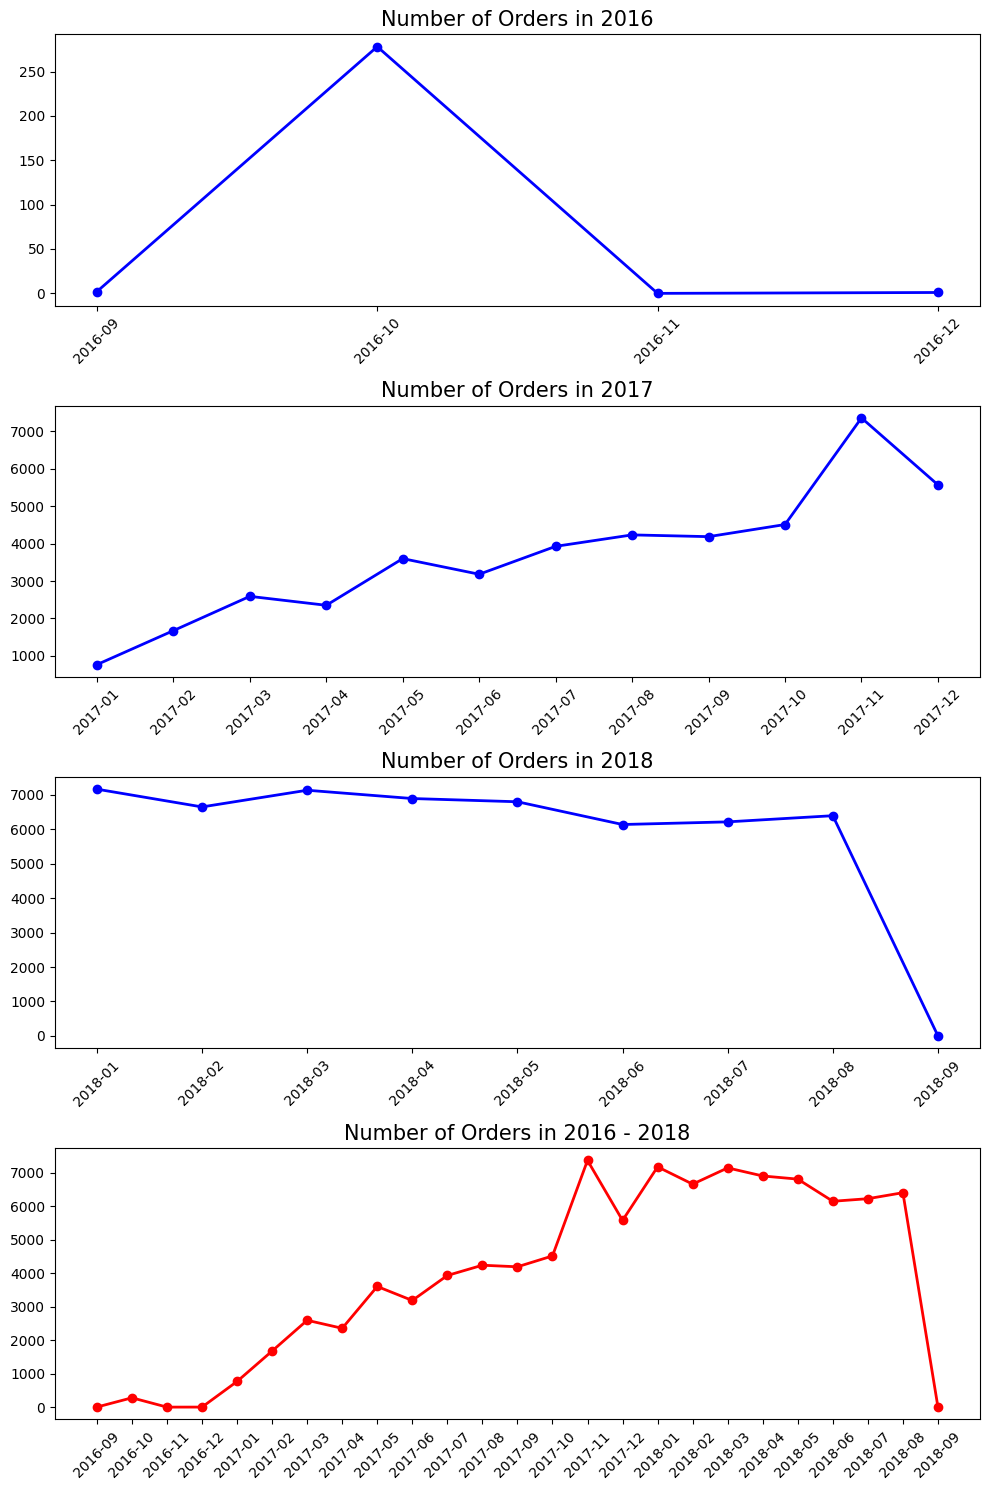

In [97]:
# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# Filter the data for each year
for i, year in enumerate([2016, 2017, 2018]):
    data_year = monthly_orders_df[monthly_orders_df['order_date'].str.startswith(
        str(year))]

    ax[i].plot(data_year["order_date"],
               data_year["order_count"],
               marker='o', linewidth=2, color="b")
    ax[i].set_title(f"Number of Orders in {year}", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=10)
    ax[i].set_xticks(range(len(data_year)), data_year["order_date"])
    ax[i].set_xticklabels(data_year["order_date"], rotation=45)

# create plot for all
ax[3].plot(monthly_orders_df["order_date"],
           monthly_orders_df["order_count"],
           marker='o', linewidth=2, color='r')
ax[3].set_title(f"Number of Orders in 2016 - 2018", fontsize=15)
ax[3].tick_params(axis='both', labelsize=10)
ax[3].set_xticks(range(len(monthly_orders_df)), monthly_orders_df["order_date"])
ax[3].set_xticklabels(monthly_orders_df["order_date"], rotation=45)

# Adjust the layout of subplots
plt.tight_layout()
plt.show()


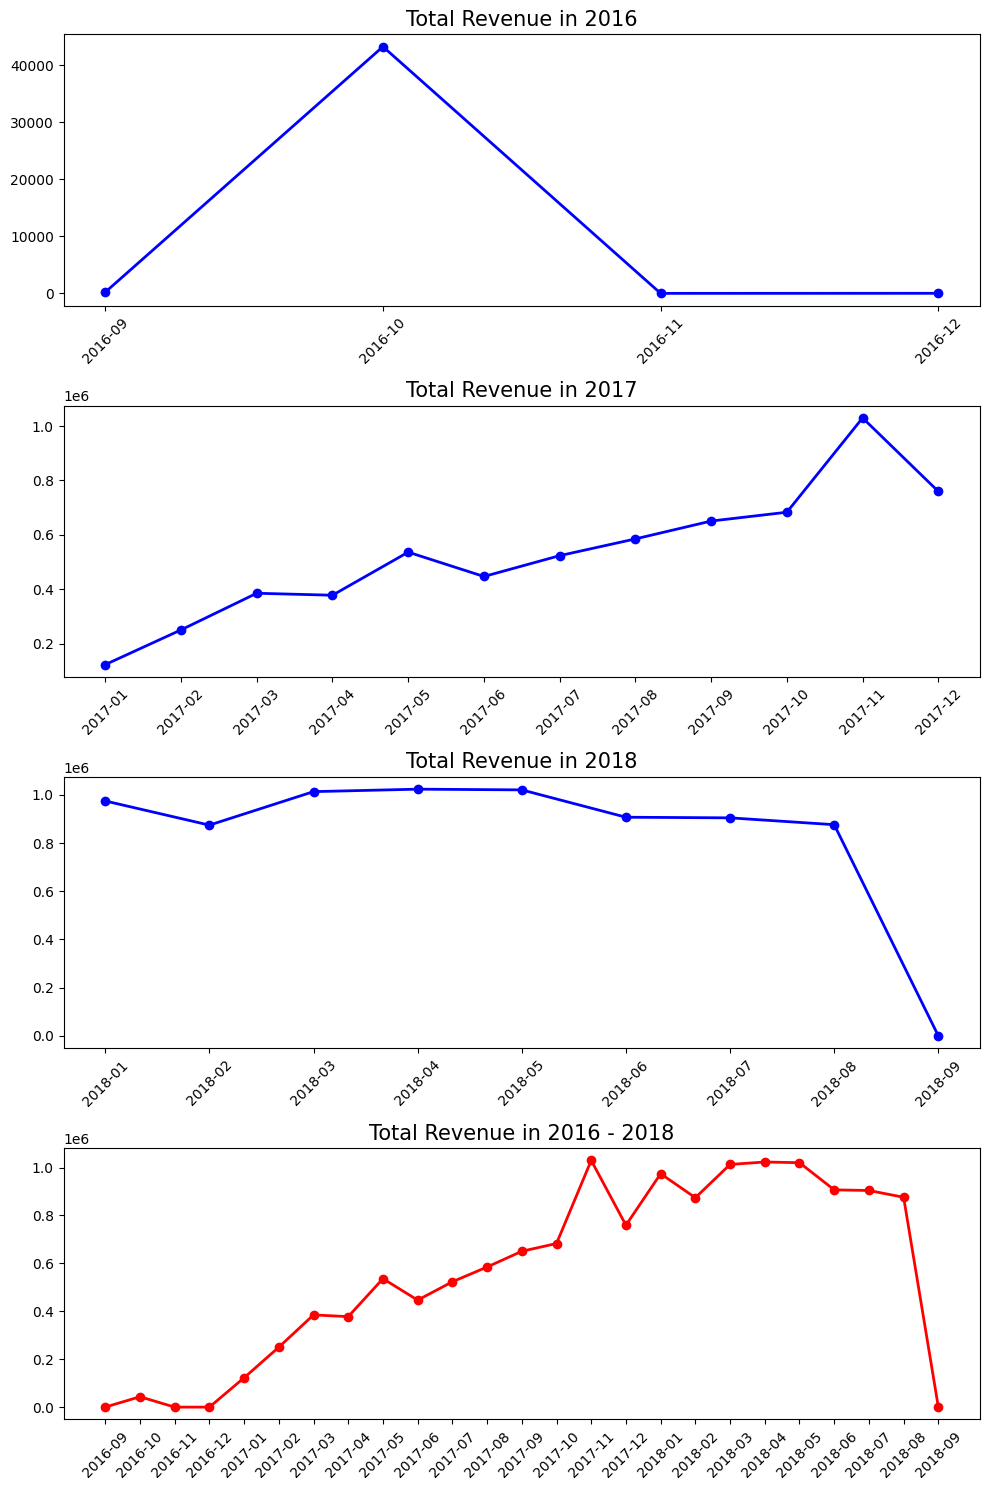

In [98]:
# Create subplots
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

# Filter the data for each year
for i, year in enumerate([2016, 2017, 2018]):
    data_year = monthly_orders_df[monthly_orders_df['order_date'].str.startswith(
        str(year))]

    ax[i].plot(data_year["order_date"],
               data_year["revenue"],
               marker='o', linewidth=2, color="b")
    ax[i].set_title(f"Total Revenue in {year}", fontsize=15)
    ax[i].tick_params(axis='both', labelsize=10)
    ax[i].set_xticks(range(len(data_year)), data_year["order_date"])
    ax[i].set_xticklabels(data_year["order_date"], rotation=45)

# create plot for all
ax[3].plot(monthly_orders_df["order_date"],
           monthly_orders_df["revenue"],
           marker='o', linewidth=2, color='r')
ax[3].set_title(f"Total Revenue in 2016 - 2018", fontsize=15)
ax[3].tick_params(axis='both', labelsize=10)
ax[3].set_xticks(range(len(monthly_orders_df)),
                 monthly_orders_df["order_date"])
ax[3].set_xticklabels(monthly_orders_df["order_date"], rotation=45)

# Adjust the layout of subplots
plt.tight_layout()
plt.show()


## 2. Which products are the best-selling and the least-selling?

In [99]:
sum_orderItem_df = all_df.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).reset_index()
sum_orderItem_df.rename(columns={
  "order_id": "quantity"
}, inplace=True)
sum_orderItem_df.head(15)

product_category_name  quantity
0          cama_mesa_banho      9381
1             beleza_saude      8764
2            esporte_lazer      7631
3   informatica_acessorios      6615
4         moveis_decoracao      6388
5    utilidades_domesticas      5823
6       relogios_presentes      5570
7                telefonia      4152
8               automotivo      3855
9               brinquedos      3834
10              cool_stuff      3605
11      ferramentas_jardim      3487
12              perfumaria      3129
13                   bebes      2842
14             eletronicos      2537

C:\Users\HP\AppData\Local\Temp\ipykernel_26900\189286481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\189286481.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


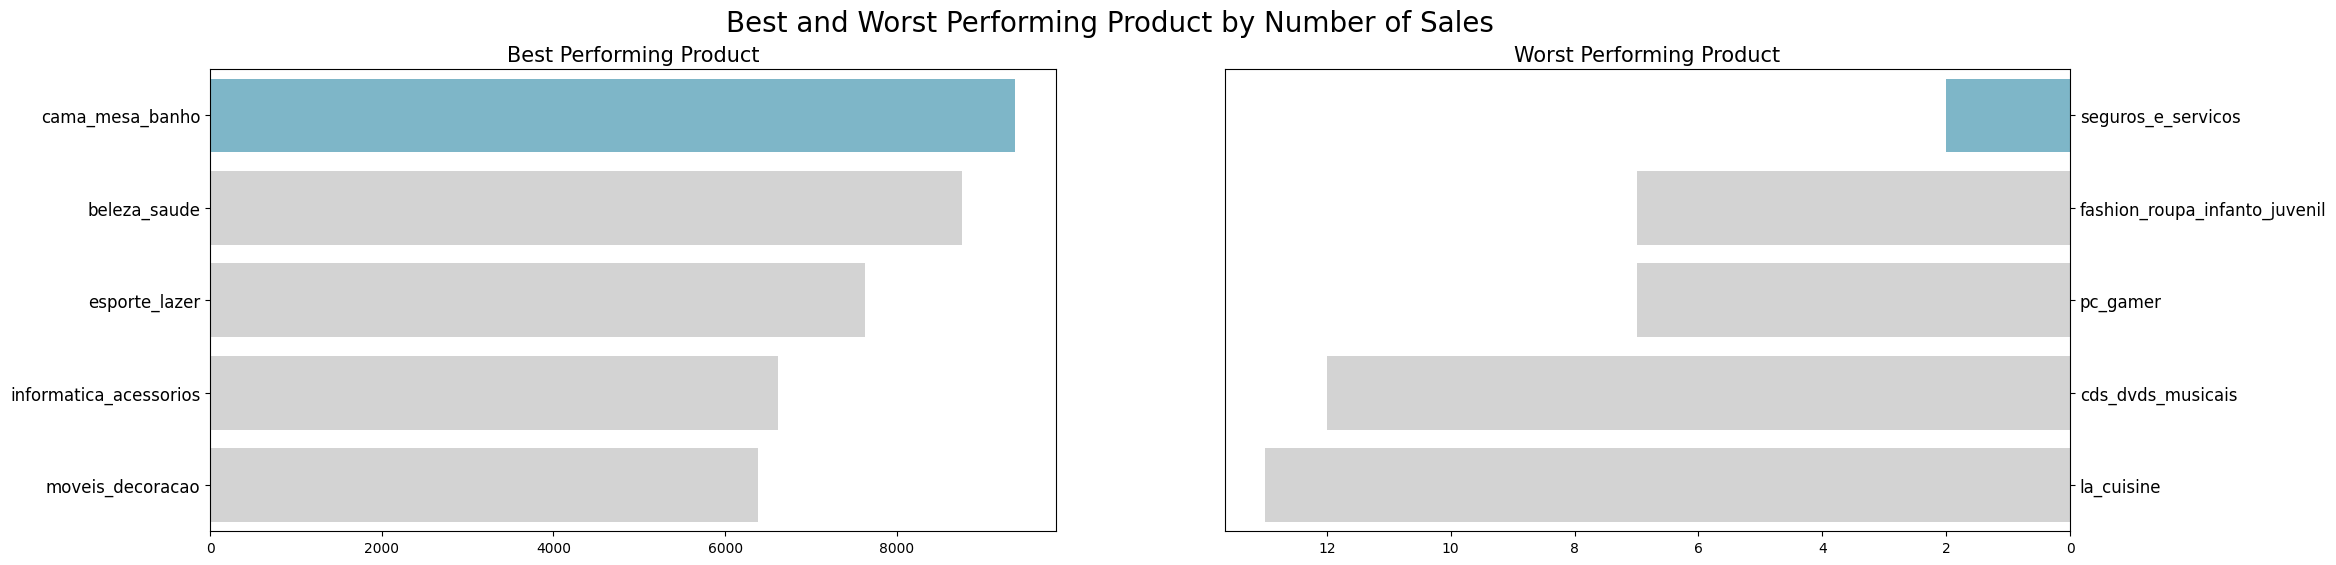

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
  x="quantity",
  y="product_category_name",
  data=sum_orderItem_df.head(5),
  palette=colors, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)


sns.barplot(
  x="quantity",
  y="product_category_name",
  data=sum_orderItem_df.sort_values(by="quantity", ascending=True).head(5),
  palette=colors, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

## 3. Who is our largest customer segment?

###  by City

C:\Users\HP\AppData\Local\Temp\ipykernel_26900\4153486819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\4153486819.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


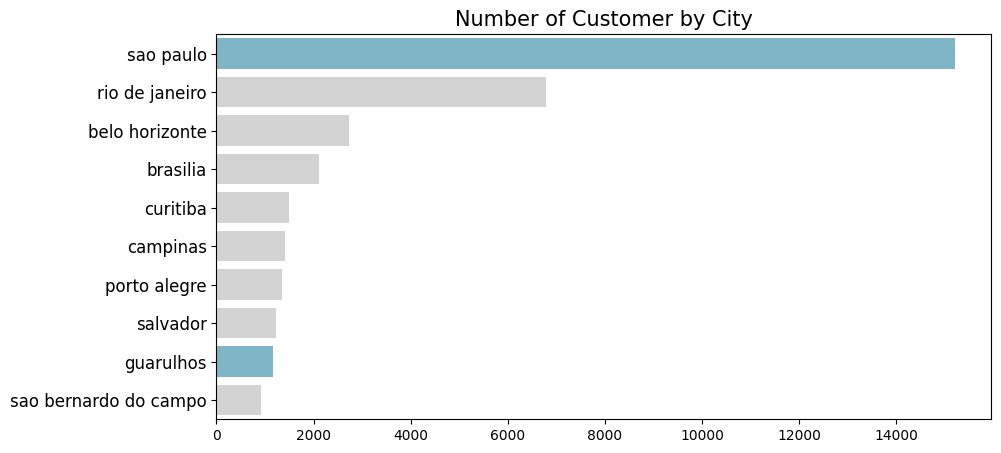

In [101]:
bycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
bycity_df.rename(columns={
  "customer_id": "customer_count"
}, inplace=True)
bycity_df

plt.figure(figsize=(10,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="customer_count",
  y="customer_city",
  data=bycity_df.sort_values(by="customer_count", ascending=False).head(10),
  palette=colors_
)
plt.title("Number of Customer by City", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

###  by State

C:\Users\HP\AppData\Local\Temp\ipykernel_26900\3648372257.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\3648372257.py:9: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


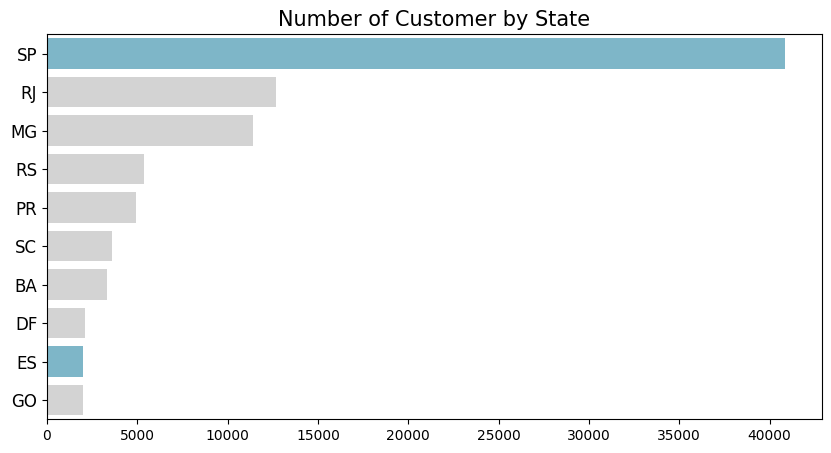

In [102]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
  "customer_id": "customer_count"
}, inplace=True)
bystate_df

plt.figure(figsize=(10,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="customer_count",
  y="customer_state",
  data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
  palette=colors_
)
plt.title("Number of Customer by State", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

## 4. Which Payment Type Do Customers Prefer for Ordering?

C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1340177787.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1340177787.py:9: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(


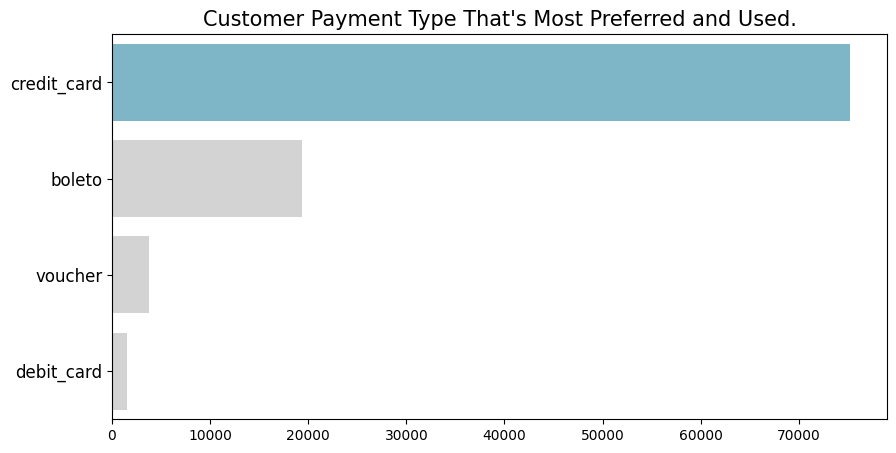

In [103]:
user_payment_df = all_df.groupby(by="payment_type").order_id.nunique().reset_index()
user_payment_df.rename(columns={
  "order_id": "order_count"
}, inplace=True)
user_payment_df

plt.figure(figsize=(10,5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="order_count",
  y="payment_type",
  data=user_payment_df.sort_values(by="order_count", ascending=False).head(),
  palette=colors_
)
plt.title("Customer Payment Type That's Most Preferred and Used.",
          loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis="y", labelsize=12)
plt.show()

## 5. When was the last time the customer made a purchase?
## 6. How often do customers make purchases?
## 7. How much money has the customer spent?

### RFM Analysis for Last 3 Questions

In [104]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
  "order_purchase_timestamp": "max",
  "order_id": "nunique",
  "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
print(recent_date)
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)


rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

2018-09-03


customer_id  frequency  monetary  recency
0  00012a2ce6f8dcda20d059ce98491703          1     89.80      293
1  000161a058600d5901f007fab4c27140          1     54.90      414
2  0001fd6190edaaf884bcaf3d49edf079          1    179.99      552
3  0002414f95344307404f0ace7a26f1d5          1    149.90      383
4  000379cdec625522490c315e70c7a9fb          1     93.00      154

In [105]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

customer_id  frequency  monetary  recency
28769  4b7decb9b58e2569548b8b4c8e20e8d7          1     145.0        0
87950  e60df9449653a95af4549bbfcb18a6eb          1     418.0        5
6300   10a79ef2783cae3d8d678e85fde235ac          1       6.9        5
32984  56b1ac2855cc6d7950b4ffa6a9b41b0d          1     109.9        5
41898  6e353700bc7bcdf6ebc15d6de16d7002          1      45.9        5

C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1674397196.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1674397196.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(top_customers["customer_id_short"], rotation=45)
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1674397196.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_26900\1674397196.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xti

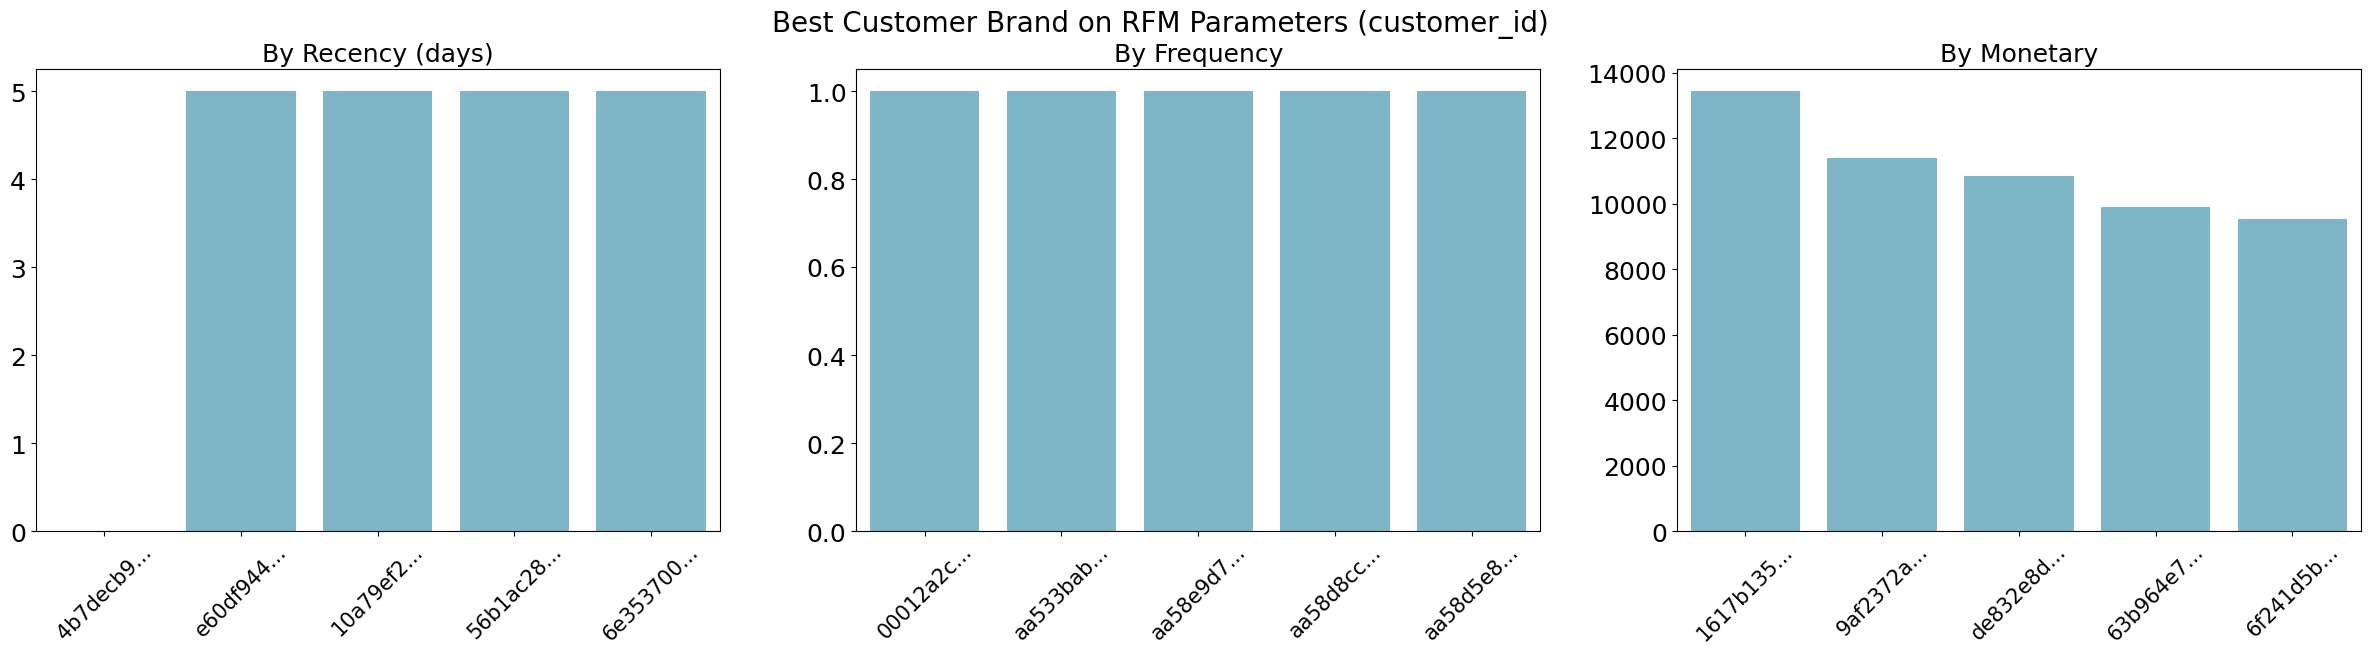

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

for i, column in enumerate(["recency", "frequency", "monetary"]):
  # the sorted data
  top_customers = rfm_df.sort_values(by=column, ascending=True if i == 0 else False).head(5)
  
  # truncate customer_id to be 8 characters
  top_customers["customer_id_short"] = top_customers["customer_id"].str[:8] + "..."
  
  sns.barplot(
    y=column,
    x="customer_id_short",
    data=top_customers,
    palette=colors,
    ax=ax[i]
  )
  ax[i].set_ylabel(None)
  ax[i].set_xlabel(None)  
  ax[i].tick_params(axis="x", labelsize=15)
  ax[i].tick_params(axis="y", labelsize=18)
  ax[i].set_xticklabels(top_customers["customer_id_short"], rotation=45)
  

ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[2].set_title("By Monetary", loc="center", fontsize=18)

plt.suptitle("Best Customer Brand on RFM Parameters (customer_id)\n", fontsize=20)
plt.show()

# Conclusion
---

1. Conclusion of Q1: How has the company's sales performance and revenue been in the last few months?
    - Company's sales performance and revenue is directly proportional.
    - Sales Performance and Revenue trend is increasing, however in September 2018 is decreasing.

2. Conclusion of Q2: Which products are the best-selling and the least-selling?
    - Products are best selling respectively is: cama_mesa_banho, beleza_saude, esporte_lazer
    - Products are least selling respectively is: seguros_e_servicos, fashion_rupa_infanto_juvenil, pc_gamer

3. Conclusion of Q3: Who is our largest customer segment?
    - by Customer City, the largest customer segment is come from: Sao Paulo, Rio de Janeiro, Belo Horizonte
    - by Customer State, the largest customer segment is come from: SP, RJ, MG

4. Conclusion of Q4: Which Payment Type Do Customers Prefer for Ordering?
    - Customer Payment Type that's most preferred and used is Credit Card    

5. Conclusion of Q5: When was the last time the customer made a purchase?
    - The last time customer made a purchase is the recent date that's 3 September 2018

6. Conclusion of Q6: How often do customers make purchases?
    - The frequency of customer make purchases is 1

7. Conclusion of Q7: How much money has the customer spent?
    - The most money has the customer spent is US$13.440

# Convert to CSV
---

In [107]:
# all_df.to_csv("data.csv", index=False)

_copyright to Naufal Mu'afi 2023_